In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

#from sklearn.linear_model import LinearRegression


In [2]:
# X-y split.
# Normalize (numerical).
# One Hot/Label Encoding (categorical).

In [3]:
df_c = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Lab/Data_Tableau/Data_Marketing_Customer_Analysis_Round2_cleaned.csv")

In [4]:
#delete all Na values and their relative rows
df_c = df_c.dropna()

Text(0.5, 1.0, 'Months Since Policy Inception')

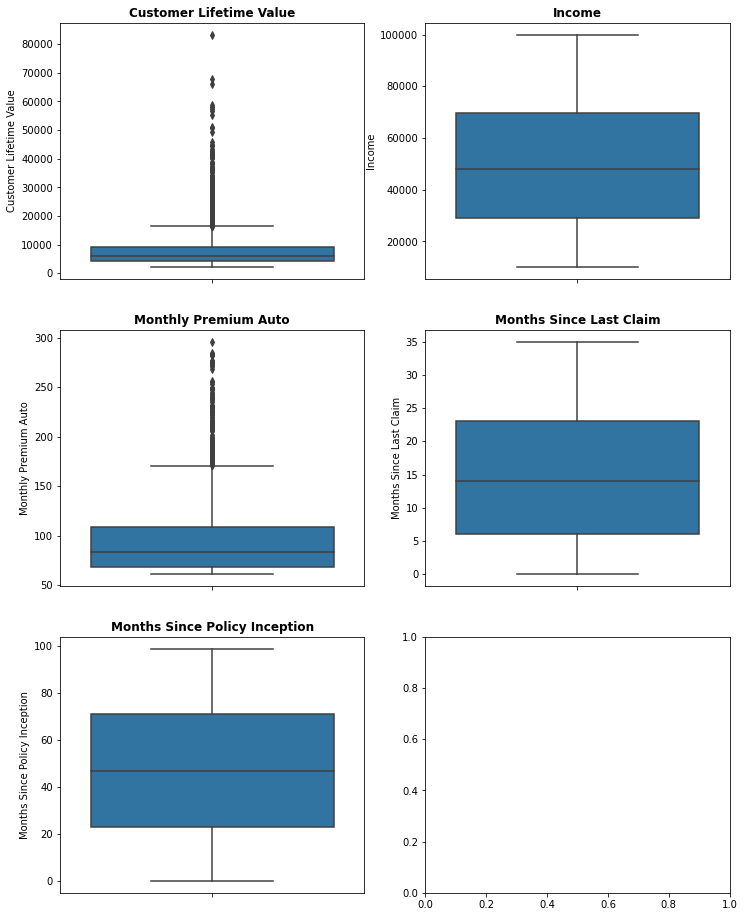

In [5]:
#use boxplot to see outlier distributions on numerical columns
fig2, ax2 = plt.subplots(3,2, figsize=(12,16))

sns.boxplot(y=df_c['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=df_c['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=df_c['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=df_c['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=df_c['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [6]:
#remove outliers using the z score 3 (top 0.3% of the values) for the column Customer Lifetime Value
mean = np.mean(df_c["Customer Lifetime Value"])
std = np.std(df_c["Customer Lifetime Value"])
threshold = 3
outlier = []
for i in df_c["Customer Lifetime Value"]:
    z = (i- mean)/std
    if z > threshold:
        outlier.append(i)
df_c = df_c[df_c["Customer Lifetime Value"].isin(outlier) == False]

In [7]:
#X-Y Split
X = df_c.drop(columns ="Total Claim Amount")
Y = df_c["Total Claim Amount"]

In [8]:
#split X to numeric and categorical and switch 2 columns that have numbers into categorical as it's best suited
X_cat= X.select_dtypes("object")
X_num = X._get_numeric_data()

In [9]:
#drop column with customwer IDs
X_cat.drop('Customer', axis=1, inplace=True)

/Users/macbookpro/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
#switch this two columns into the categoricals df
X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
X_cat['Number of Policies'] = df_c['Number of Policies']
X_num.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_18637/3879545936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_18637/3879545936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Policies'] = df_c['Number of Policies']


In [11]:
#X_cat

In [12]:
#Convert categorical variable into dummy variables
Cat_col=pd.get_dummies(X_cat, drop_first=True)

In [13]:
#rejoin the data frame but with dummy variables instead of categoricals
X = pd.concat([Cat_col,X_num], axis=1)

In [14]:
#removed the least 6 imporatant features as they decrease the model score
X.drop(columns = ["Effective To Date_1/19/11", "Effective To Date_2/1/11", "Effective To Date_2/6/11", "Effective To Date_2/7/11", "Effective To Date_2/20/11", "Policy_Corporate L2"], inplace = True)

In [15]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=123)



In [16]:
#standardize the data
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [17]:
#create a model for a linear regression
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
#model.coef_
#model.intercept_

LinearRegression()

In [18]:
#R2 for test
R2_test=model.score(X_test_scaled,Y_test)
print(R2_test)
Adj_R2= 1 - (1-R2_test)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
print(Adj_R2)

0.8098998438175413
0.7754910341859493


In [19]:
# R2 for train
R2=model.score(X_train_scaled,Y_train)
print(R2)
Adj_R2= 1 - (1-R2)*(len(Y_train)-1)/(len(Y_train)-X_train_scaled.shape[1]-1)
print(Adj_R2)

0.7961875842388276
0.7880768458653531


In [20]:
# model prediction and data frame comparing Y_test and Y_pred
Y_pred=model.predict(X_test_scaled)  
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})
result

,Y_test,Y_pred
4924,701.71,503.677317
9095,296.21,341.695180
9106,56.37,11.802180
8118,1961.16,981.493279
2718,633.60,508.138329
...,...,...
6309,621.46,550.415271
913,403.20,479.507246
8136,331.20,423.341556
4366,8.32,25.874237


In [21]:
#MSE
MSE = np.mean( np.power( Y_test - Y_pred , 2 ) )
print(MSE)

13050.3418329034


In [22]:
#mean squared error and R2
from sklearn.metrics import mean_squared_error, r2_score
print("The mean_squared_error is {:.2f}".format(mean_squared_error(Y_test,Y_pred)))
print("The R2 is {:.2f}".format(r2_score(Y_test,Y_pred)))

The mean_squared_error is 13050.34
The R2 is 0.81


In [23]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE

114.23809274013375

In [24]:
#MAE
MAE = np.mean( np.abs( Y_test - Y_pred ) )
MAE

79.78749537290875

In [25]:
#showing the least important features to eliminate them and improve the model
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)
features_importances

,Attribute,Importance
21,Effective To Date_1/18/11,2.818484e-02
95,Vehicle Size_Small,4.192943e-02
58,Effective To Date_2/26/11,7.459710e-02
73,Marital Status_Single,8.576084e-02
53,Effective To Date_2/21/11,1.306157e-01
...,...,...
74,Policy Type_Personal Auto,1.433979e+15
79,Policy_Personal L3,1.606478e+15
82,Policy_Special L3,1.891937e+15
81,Policy_Special L2,1.967671e+15


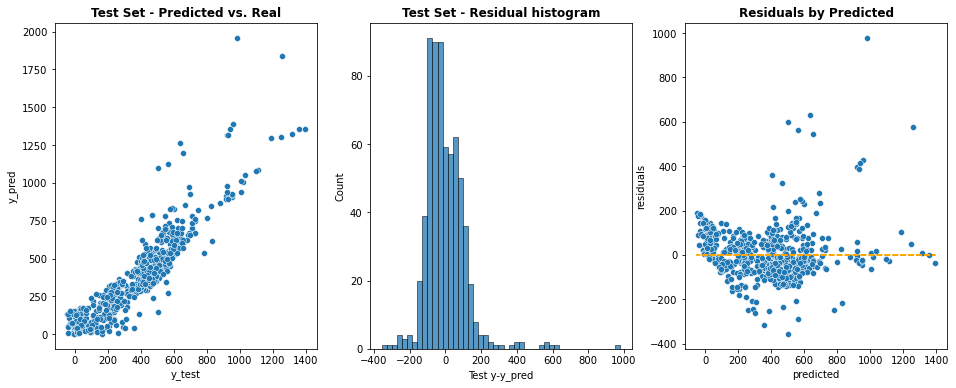

In [26]:
#Y_test and Y_pred scatterplot
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=Y_pred, y=Y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(Y_test-Y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = Y_pred,y = Y_test - Y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed', color='orange')